> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

### at the first, I export two csvs files from the data base by SQL

the first csv is contains all data about teams "teams.csv"
```
SELECT t.team_long_name, t.team_short_name,ta.*
FROM Team_Attributes  AS ta
LEFT JOIN Team AS t
ON ta.team_api_id = t.team_api_id 
	and ta.team_fifa_api_id = t.team_fifa_api_id;
```
the second csv is conatains all data about players "players.csv"
```
SELECT pa.player_api_id, pa.player_fifa_api_id, p.player_name,
		pa.date, pa.overall_rating, pa.penalties
FROM Player_Attributes  AS pa
LEFT JOIN Player AS p
ON pa.player_api_id = p.player_api_id 
    and pa.player_fifa_api_id = p.player_fifa_api_id;
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties
>#### Data Wrangling "teams.csv"

In [2]:
df_teams = pd.read_csv('teams.csv')
df_teams.head()

,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,FC Aarau,AAR,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,FC Aarau,AAR,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,FC Aarau,AAR,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,Aberdeen,ABE,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,Aberdeen,ABE,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [3]:
#check missing data for dataframe df_teams and type of each columns 
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossi

In [4]:
# check duplicated rows for teams
sum(df_teams.duplicated())

0

In [5]:
# classes of Dribbling when build up Play Dribbling is null
df_teams[df_teams.buildUpPlayDribbling.isnull()]['buildUpPlayDribblingClass'].unique()

array(['Little'], dtype=object)

In [6]:
# classes of Dribbling
df_teams['buildUpPlayDribblingClass'].unique()

array(['Little', 'Normal', 'Lots'], dtype=object)

In [7]:
#check if buildUpPlayDribblingClass = 'Little' and buildUpPlayDribbing is not NaN
# and name this dataframe to use this data frame to fill NaN
df_dribbling_little = df_teams[(df_teams.buildUpPlayDribblingClass == 'Little') & (~(df_teams.buildUpPlayDribbling.isnull()))]
df_dribbling_little.head()

,team_long_name,team_short_name,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
80,Aston Villa,AVL,81,2,10252,2014-09-19 00:00:00,66,Balanced,32.0,Little,...,56,Normal,Organised,39,Medium,42,Press,52,Normal,Cover
140,Bayer 04 Leverkusen,LEV,141,32,8178,2014-09-19 00:00:00,69,Fast,30.0,Little,...,39,Normal,Organised,50,Medium,46,Press,54,Normal,Cover
141,Bayer 04 Leverkusen,LEV,142,32,8178,2015-09-10 00:00:00,73,Fast,29.0,Little,...,61,Normal,Organised,61,Medium,72,Double,50,Normal,Cover
147,FC Bayern Munich,BMU,148,21,9823,2015-09-10 00:00:00,45,Balanced,24.0,Little,...,22,Little,Free Form,72,High,53,Press,59,Normal,Cover
171,Birmingham City,BIR,172,88,8658,2015-09-10 00:00:00,56,Balanced,32.0,Little,...,64,Normal,Organised,42,Medium,47,Press,54,Normal,Cover



> #### Data Wrangling "players.csv"

In [8]:
# define data frame for players
df_players = pd.read_csv('players.csv')
df_players.head()

,player_api_id,player_fifa_api_id,player_name,date,overall_rating,penalties
0,505942,218353,Aaron Appindangoye,2016-02-18 00:00:00,67.0,48.0
1,505942,218353,Aaron Appindangoye,2015-11-19 00:00:00,67.0,48.0
2,505942,218353,Aaron Appindangoye,2015-09-21 00:00:00,62.0,48.0
3,505942,218353,Aaron Appindangoye,2015-03-20 00:00:00,61.0,47.0
4,505942,218353,Aaron Appindangoye,2007-02-22 00:00:00,61.0,47.0


In [9]:
# check the type of columns and number of each row for df_players
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 6 columns):
player_api_id         183978 non-null int64
player_fifa_api_id    183978 non-null int64
player_name           183766 non-null object
date                  183978 non-null object
overall_rating        183142 non-null float64
penalties             183142 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 8.4+ MB


In [10]:
# check number of duplicated for df_players
sum(df_players.duplicated())

1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (drop columns, fill nulls,  and edit types of columns)

In [11]:
#make copy for each data frame to work on it 
df_teams_copy = df_teams.copy()
df_players_copy = df_players.copy()

> #### Data Cleaning 'df_teams'

In [12]:
# fill nulls in column buildUpPlayDribbling by df_dribbling_little
mean_nulls = df_dribbling_little['buildUpPlayDribbling'].mean()
df_teams['buildUpPlayDribbling'].fillna(mean_nulls, inplace = True)
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 27 columns):
team_long_name                    1458 non-null object
team_short_name                   1458 non-null object
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1458 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCross

In [13]:
# remove nothing important columns to my Questions first for teams
# if column name contains name Class then rename it to True else let it default name
df_teams.rename(columns=lambda x: True if 'Class' in x else x , inplace = True)
df_teams.drop(columns = ['id',True], inplace = True)
df_teams.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,FC Aarau,AAR,434,9930,2010-02-22 00:00:00,60,30.485714,50,60,65,55,50,55,45
1,FC Aarau,AAR,434,9930,2014-09-19 00:00:00,52,48.000000,56,54,63,64,47,44,54
2,FC Aarau,AAR,434,9930,2015-09-10 00:00:00,47,41.000000,54,54,63,64,47,44,54
3,Aberdeen,ABE,77,8485,2010-02-22 00:00:00,70,30.485714,70,70,70,70,60,70,70
4,Aberdeen,ABE,77,8485,2011-02-22 00:00:00,47,30.485714,52,53,48,52,47,47,52


In [14]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 14 columns):
team_long_name            1458 non-null object
team_short_name           1458 non-null object
team_fifa_api_id          1458 non-null int64
team_api_id               1458 non-null int64
date                      1458 non-null object
buildUpPlaySpeed          1458 non-null int64
buildUpPlayDribbling      1458 non-null float64
buildUpPlayPassing        1458 non-null int64
chanceCreationPassing     1458 non-null int64
chanceCreationCrossing    1458 non-null int64
chanceCreationShooting    1458 non-null int64
defencePressure           1458 non-null int64
defenceAggression         1458 non-null int64
defenceTeamWidth          1458 non-null int64
dtypes: float64(1), int64(10), object(3)
memory usage: 159.5+ KB


In [15]:
#calculate average of all skills for each row then put them at new column 'over_all_skills'
def calculate_average_row( row):
    average = (sum(row[5:])/len(row[5:]))
    return average
df_teams['over_all_skills'] = df_teams.apply(calculate_average_row,axis =1)
df_teams.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,over_all_skills
0,FC Aarau,AAR,434,9930,2010-02-22 00:00:00,60,30.485714,50,60,65,55,50,55,45,52.276190
1,FC Aarau,AAR,434,9930,2014-09-19 00:00:00,52,48.000000,56,54,63,64,47,44,54,53.555556
2,FC Aarau,AAR,434,9930,2015-09-10 00:00:00,47,41.000000,54,54,63,64,47,44,54,52.000000
3,Aberdeen,ABE,77,8485,2010-02-22 00:00:00,70,30.485714,70,70,70,70,60,70,70,64.498413
4,Aberdeen,ABE,77,8485,2011-02-22 00:00:00,47,30.485714,52,53,48,52,47,47,52,47.609524


In [16]:
#drop columns that are calculated in over_all_skills
df_teams.drop(df_teams.columns[5:-1], axis= 1, inplace = True)
df_teams.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,date,over_all_skills
0,FC Aarau,AAR,434,9930,2010-02-22 00:00:00,52.276190
1,FC Aarau,AAR,434,9930,2014-09-19 00:00:00,53.555556
2,FC Aarau,AAR,434,9930,2015-09-10 00:00:00,52.000000
3,Aberdeen,ABE,77,8485,2010-02-22 00:00:00,64.498413
4,Aberdeen,ABE,77,8485,2011-02-22 00:00:00,47.609524


In [17]:
#convert type of date from string from stirn to timedate in df_teams_copy
df_teams['date'] = pd.to_datetime(df_teams['date'])
#convert type of team_fifa_api_id and team_api_if from int to string in df_teams
df_teams['team_fifa_api_id'] = df_teams['team_fifa_api_id'].astype(str)
df_teams['team_api_id'] = df_teams['team_api_id'].astype(str)
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 6 columns):
team_long_name      1458 non-null object
team_short_name     1458 non-null object
team_fifa_api_id    1458 non-null object
team_api_id         1458 non-null object
date                1458 non-null datetime64[ns]
over_all_skills     1458 non-null float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 68.4+ KB


In [18]:
df_teams.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,date,over_all_skills
0,FC Aarau,AAR,434,9930,2010-02-22,52.276190
1,FC Aarau,AAR,434,9930,2014-09-19,53.555556
2,FC Aarau,AAR,434,9930,2015-09-10,52.000000
3,Aberdeen,ABE,77,8485,2010-02-22,64.498413
4,Aberdeen,ABE,77,8485,2011-02-22,47.609524


> #### Data Cleaning "df_players"

In [19]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 6 columns):
player_api_id         183978 non-null int64
player_fifa_api_id    183978 non-null int64
player_name           183766 non-null object
date                  183978 non-null object
overall_rating        183142 non-null float64
penalties             183142 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 8.4+ MB


In [20]:
#drop rows have nulls in df_players 
df_players.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183016 entries, 0 to 183977
Data columns (total 6 columns):
player_api_id         183016 non-null int64
player_fifa_api_id    183016 non-null int64
player_name           183016 non-null object
date                  183016 non-null object
overall_rating        183016 non-null float64
penalties             183016 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 9.8+ MB


> #### Note
> I show that the number of rows non-null in penalties column have decresed when removing nulls from data frame because rows have nulls in column player_name, it's different row that have nulls in column penalties so I remove player_name column from data frame then remove nulls from data frame.

In [21]:
#remove comlumn player_name from df_players to remove only rows have nulls in pelnaties and overall_re
df_players.drop(columns = 'player_name', inplace = True)
df_players.dropna(inplace = True)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
player_api_id         183142 non-null int64
player_fifa_api_id    183142 non-null int64
date                  183142 non-null object
overall_rating        183142 non-null float64
penalties             183142 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.4+ MB


In [22]:
##convert type of date from stirng to timedate in df_players_copy
df_players['date'] = pd.to_datetime(df_players_copy['date'])
#convert type of player_api_id and player_fifa_api_id from int to string in df_players_copy
df_players['player_api_id'] = df_players['player_api_id'].astype(str)
df_players['player_fifa_api_id'] = df_players['player_fifa_api_id'].astype(str)
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183142 entries, 0 to 183977
Data columns (total 5 columns):
player_api_id         183142 non-null object
player_fifa_api_id    183142 non-null object
date                  183142 non-null datetime64[ns]
overall_rating        183142 non-null float64
penalties             183142 non-null float64
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.4+ MB


In [23]:
sum(df_players.duplicated())

0

In [24]:
df_players.head()

,player_api_id,player_fifa_api_id,date,overall_rating,penalties
0,505942,218353,2016-02-18,67.0,48.0
1,505942,218353,2015-11-19,67.0,48.0
2,505942,218353,2015-09-21,62.0,48.0
3,505942,218353,2015-03-20,61.0,47.0
4,505942,218353,2007-02-22,61.0,47.0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### What teams improved the most over the time period?

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [36]:
# I Use teams data frame to solve this question
df_teams.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,date,over_all_skills
0,FC Aarau,AAR,434,9930,2010-02-22,52.276190
1,FC Aarau,AAR,434,9930,2014-09-19,53.555556
2,FC Aarau,AAR,434,9930,2015-09-10,52.000000
3,Aberdeen,ABE,77,8485,2010-02-22,64.498413
4,Aberdeen,ABE,77,8485,2011-02-22,47.609524


In [98]:
# date of data collected
df_teams['date'].unique()

array(['2010-02-22T00:00:00.000000000', '2014-09-19T00:00:00.000000000',
       '2015-09-10T00:00:00.000000000', '2011-02-22T00:00:00.000000000',
       '2012-02-22T00:00:00.000000000', '2013-09-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [142]:
#make data frame contains all data at 2010-02-22
over_2010 = df_teams.query('date == "2010-02-22"')
over_2010.rename(columns = {'over_all_skills': 'over_all_skills_2010'},inplace = True)
over_2010.drop(columns = 'date', inplace = True)

In [143]:
#make data frame contains all data at 2011-02-22
over_2011 = df_teams.query('date == "2011-02-22"')
over_2011.rename(columns = {'over_all_skills': 'over_all_skills_2011'},inplace = True)
over_2011.drop(columns = 'date', inplace = True)

In [144]:
# make new data fram to merge all data frames in one data frame
over_all = pd.merge(over_2010, over_2011, how = 'outer', on=['team_long_name','team_short_name','team_fifa_api_id','team_api_id'])

In [145]:
#make data frame contains all data at 2012-02-22
over_2012 = df_teams.query('date == "2012-02-22"')
over_2012.rename(columns = {'over_all_skills': 'over_all_skills_2012'},inplace = True)
over_2012.drop(columns = 'date', inplace = True)

In [146]:
#merge new data frame to over_all data frame
over_all = over_all.merge(over_2012, how = 'outer', on=['team_long_name','team_short_name','team_fifa_api_id','team_api_id'])

In [147]:
#make data frame contains all data at 2013-09-20
over_2013 = df_teams.query('date == "2013-09-20"')
over_2013.rename(columns = {'over_all_skills': 'over_all_skills_2013'},inplace = True)
over_2013.drop(columns = 'date', inplace = True)

In [148]:
#merge new data frame to over_all data frame
over_all = over_all.merge(over_2013, how = 'outer', on=['team_long_name','team_short_name','team_fifa_api_id','team_api_id'])

In [149]:
#make data frame contains all data at 2014-09-19
over_2014 = df_teams.query('date == "2014-09-19"')
over_2014.rename(columns = {'over_all_skills': 'over_all_skills_2014'},inplace = True)
over_2014.drop(columns = 'date', inplace = True)

In [150]:
#merge new data frame to over_all data frame
over_all = over_all.merge(over_2014, how = 'outer', on=['team_long_name','team_short_name','team_fifa_api_id','team_api_id'])

In [151]:
#make data frame contains all data at 2015-09-10
over_2015 = df_teams.query('date == "2015-09-10"')
over_2015.rename(columns = {'over_all_skills': 'over_all_skills_2015'},inplace = True)
over_2015.drop(columns = 'date', inplace = True)

In [152]:
#merge new data frame to over_all data frame
over_all = over_all.merge(over_2015, how = 'outer', on=['team_long_name','team_short_name','team_fifa_api_id','team_api_id'])

In [153]:
over_all.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,over_all_skills_2010,over_all_skills_2011,over_all_skills_2012,over_all_skills_2013,over_all_skills_2014,over_all_skills_2015
0,FC Aarau,AAR,434,9930,52.276190,NaN,NaN,NaN,53.555556,52.000000
1,Aberdeen,ABE,77,8485,64.498413,47.609524,51.165079,47.387302,56.444444,57.666667
2,AC Ajaccio,AJA,614,8576,43.942857,51.165079,45.942857,45.942857,49.333333,49.333333
3,Milan,ACM,47,8564,44.498413,50.609524,44.498413,50.053968,56.777778,56.111111
4,Académica de Coimbra,ACA,1901,10215,38.387302,45.053968,49.165079,49.165079,50.333333,50.444444


In [154]:
over_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 288
Data columns (total 10 columns):
team_long_name          289 non-null object
team_short_name         289 non-null object
team_fifa_api_id        289 non-null object
team_api_id             289 non-null object
over_all_skills_2010    241 non-null float64
over_all_skills_2011    244 non-null float64
over_all_skills_2012    242 non-null float64
over_all_skills_2013    242 non-null float64
over_all_skills_2014    244 non-null float64
over_all_skills_2015    245 non-null float64
dtypes: float64(6), object(4)
memory usage: 24.8+ KB


In [165]:
def define_nans_over_all(row):
    average = (row[4:]).mean()
    row[4:].fillna(average, inplace = True)
    return row

In [173]:
over_all = over_all.apply(define_nans_over_all, axis = 1)

In [174]:
over_all.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,over_all_skills_2010,over_all_skills_2011,over_all_skills_2012,over_all_skills_2013,over_all_skills_2014,over_all_skills_2015
0,FC Aarau,AAR,434,9930,52.276190,52.610582,52.610582,52.610582,53.555556,52.000000
1,Aberdeen,ABE,77,8485,64.498413,47.609524,51.165079,47.387302,56.444444,57.666667
2,AC Ajaccio,AJA,614,8576,43.942857,51.165079,45.942857,45.942857,49.333333,49.333333
3,Milan,ACM,47,8564,44.498413,50.609524,44.498413,50.053968,56.777778,56.111111
4,Académica de Coimbra,ACA,1901,10215,38.387302,45.053968,49.165079,49.165079,50.333333,50.444444


In [216]:
def calculate_max_diff_offer_year(row):
    diff_row = []
    for i in range(len(row[4:])-1):
        diff_row.append((row[(5+i)]- row[(4+i)]))
    diff_row = np.array(diff_row)
    return diff_row.max()

In [291]:
over_all['max_improved_per_year'] = over_all.apply(calculate_max_diff_offer_year, axis = 1)

In [318]:
over_all.head()

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,over_all_skills_2010,over_all_skills_2011,over_all_skills_2012,over_all_skills_2013,over_all_skills_2014,over_all_skills_2015,max_improved_per_year
0,FC Aarau,AAR,434,9930,52.276190,52.610582,52.610582,52.610582,53.555556,52.000000,0.944974
1,Aberdeen,ABE,77,8485,64.498413,47.609524,51.165079,47.387302,56.444444,57.666667,9.057143
2,AC Ajaccio,AJA,614,8576,43.942857,51.165079,45.942857,45.942857,49.333333,49.333333,7.222222
3,Milan,ACM,47,8564,44.498413,50.609524,44.498413,50.053968,56.777778,56.111111,6.723810
4,Académica de Coimbra,ACA,1901,10215,38.387302,45.053968,49.165079,49.165079,50.333333,50.444444,6.666667


In [319]:
over_all.to_csv('teams_over_all_time.csv',index = False)

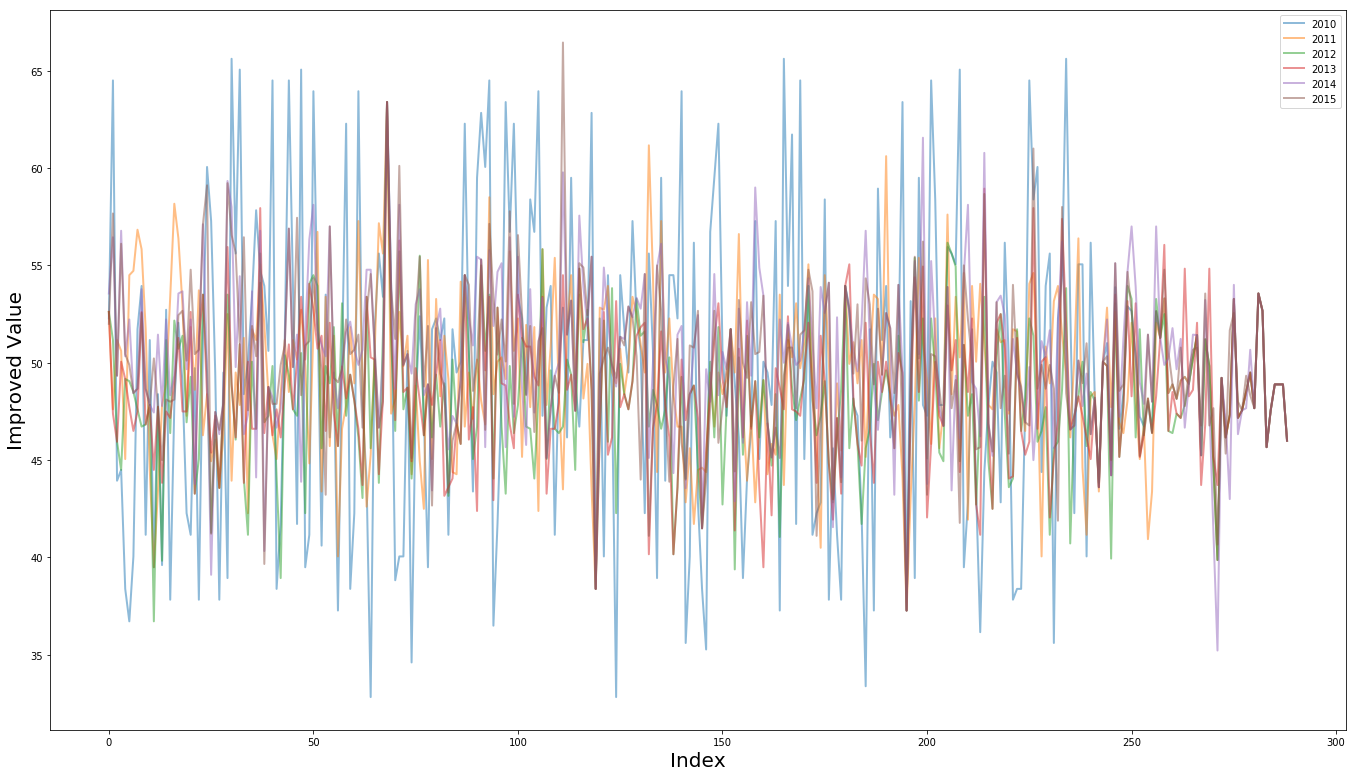

In [336]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1,3 , 2.5])
plt.plot(over_all['over_all_skills_2010'],alpha = 0.5,label ='2010', linewidth= 2)
plt.plot(over_all['over_all_skills_2011'], alpha = 0.5,label = '2011', linewidth= 2)
plt.plot(over_all['over_all_skills_2012'], alpha = 0.5,label = '2012', linewidth= 2)
plt.plot(over_all['over_all_skills_2013'], alpha = 0.5,label = '2013', linewidth= 2)
plt.plot(over_all['over_all_skills_2014'], alpha = 0.5,label = '2014', linewidth= 2)
plt.plot(over_all['over_all_skills_2015'], alpha = 0.5,label = '2015', linewidth= 2)
ax.legend( loc='upper right')
plt.xlabel('Index', fontdict = {'fontsize': 20, 'fontweight': 1})
plt.ylabel('Improved Value', fontdict = {'fontsize':20, 'fontweight':1})
plt.show()

Text(0, 0.5, 'Difference of Improved Value Between years')

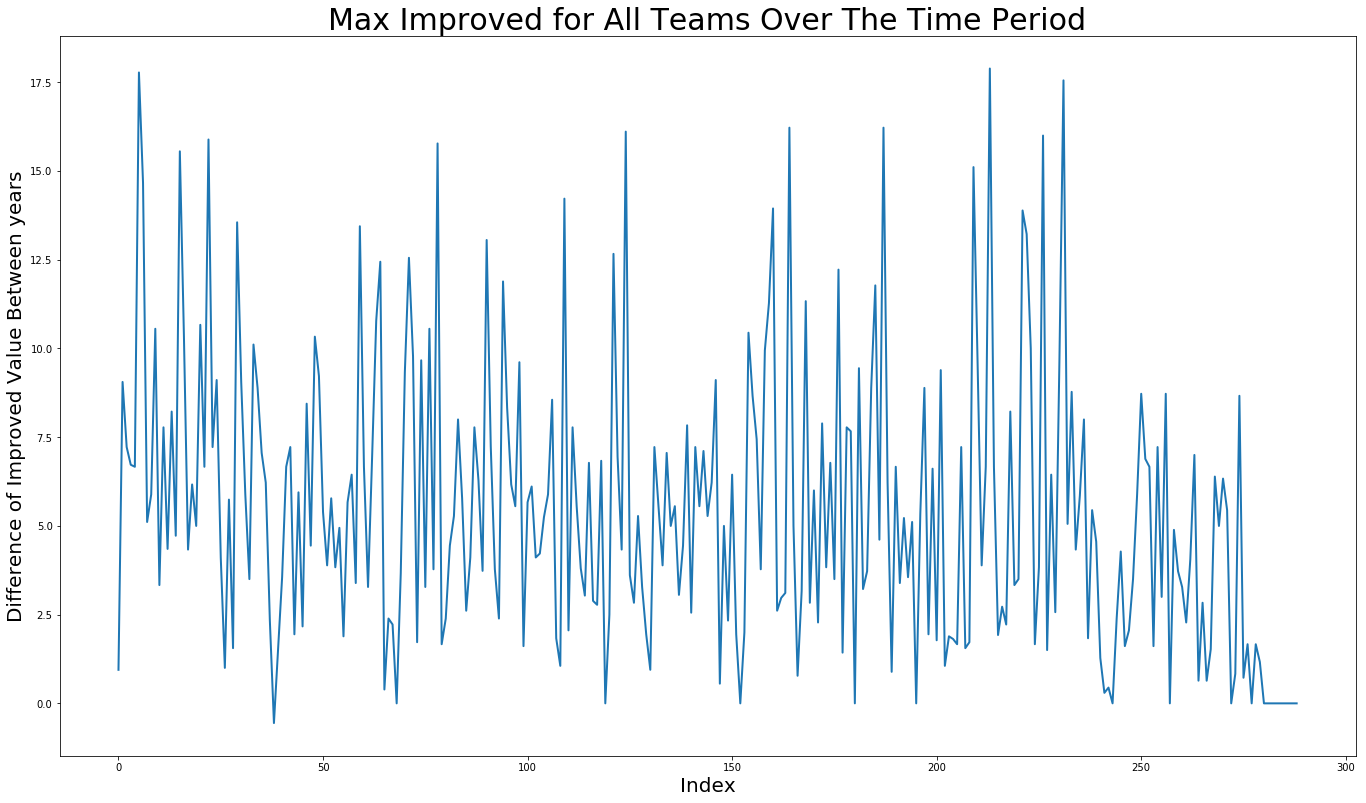

In [332]:
fig = plt.figure()
ax = fig.add_axes([0.01, 0.01,3 , 2.5])
plt.plot(over_all['max_improved_per_year'], linewidth= 2)
plt.title('Max Improved for All Teams Over The Time Period',fontdict = {'fontsize': 30,
 'fontweight' : 2 })
plt.xlabel('Index', fontdict = {'fontsize': 20, 'fontweight': 1})
plt.ylabel('Difference of Improved Value Between years', fontdict = {'fontsize':20, 'fontweight':1})

In [322]:
max_improved_teams = over_all.sort_values(by=['max_improved_per_year'],ascending=False).head(10)

In [323]:
#Top 10 max teams imporved over the period time
max_improved_teams

,team_long_name,team_short_name,team_fifa_api_id,team_api_id,over_all_skills_2010,over_all_skills_2011,over_all_skills_2012,over_all_skills_2013,over_all_skills_2014,over_all_skills_2015,max_improved_per_year
213,FC Twente,TWE,1908,8611,36.165079,54.053968,47.720635,41.165079,46.222222,45.666667,17.888889
5,ADO Den Haag,HAA,650,10217,36.720635,54.498413,49.053968,47.720635,52.222222,49.888889,17.777778
231,Willem II,WII,1907,8525,35.609524,53.165079,45.623810,45.053968,45.623810,48.666667,17.555556
164,PSV,PSV,247,8640,37.276190,53.498413,41.053968,48.720635,52.222222,45.111111,16.222222
187,SC Heerenveen,HEE,1913,10228,37.276190,53.498413,49.942857,43.831746,48.777778,48.888889,16.222222
124,Livorno,LIV,1844,8537,32.831746,48.942857,42.276190,53.165079,48.777778,49.222222,16.111111
226,SV Werder Bremen,WBR,38,8697,58.387302,54.609524,51.387302,57.942857,45.000000,61.000000,16.000000
22,Bari,BAR,1848,9976,37.831746,53.720635,45.053968,51.276190,51.000000,50.666667,15.888889
78,Frosinone,FRO,111657,9891,39.498413,55.276190,48.887831,48.887831,48.887831,51.888889,15.777778
15,Atalanta,ATA,39,8524,37.831746,53.387302,46.387302,47.165079,48.333333,48.000000,15.555556


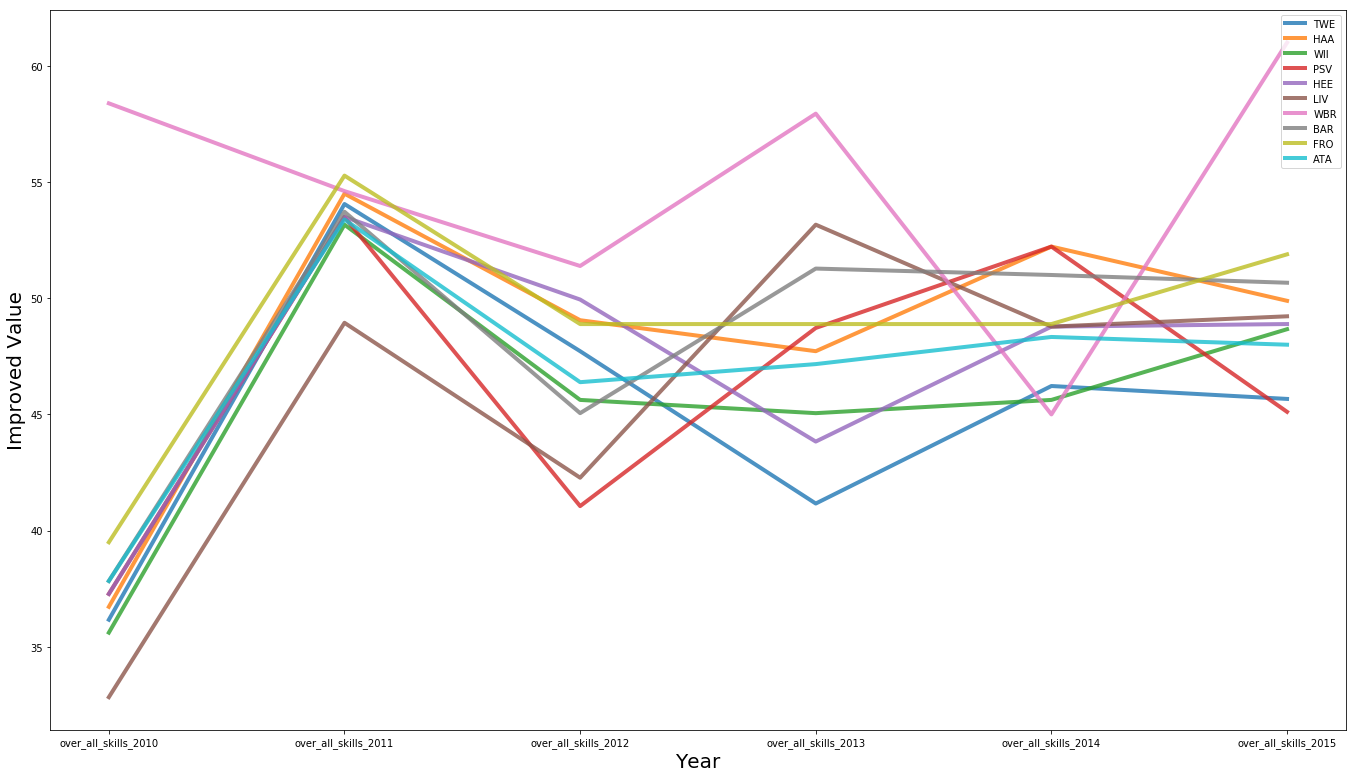

In [339]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1,3 , 2.5])
plt.plot(max_improved_teams.iloc[0,4:-1], label = max_improved_teams.iloc[0,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[1,4:-1], label = max_improved_teams.iloc[1,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[2,4:-1], label = max_improved_teams.iloc[2,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[3,4:-1], label = max_improved_teams.iloc[3,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[4,4:-1], label = max_improved_teams.iloc[4,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[5,4:-1], label = max_improved_teams.iloc[5,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[6,4:-1], label = max_improved_teams.iloc[6,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[7,4:-1], label = max_improved_teams.iloc[7,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[8,4:-1], label = max_improved_teams.iloc[8,1], alpha =0.8, linewidth= 4)
plt.plot(max_improved_teams.iloc[9,4:-1], label = max_improved_teams.iloc[9,1], alpha =0.8, linewidth= 4)
ax.legend( loc='upper right')
plt.xlabel('Year', fontdict = {'fontsize': 20, 'fontweight': 1})
plt.ylabel('Improved Value', fontdict = {'fontsize':20, 'fontweight':1})
plt.show()


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!